# NI-VSM HW 2

Tým:

- Bittner Jan
- Bodnárová Radka
- Hošková Radka

In [0]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# HW settings
K = 16
L = len('Bittner')
X = ((K * L * 23) % 20) + 1
Y = ((X + ((K * 5 + L * 7) % 19)) % 20) + 1

x_file = str(X).zfill(3) + ".txt" # file name
x_file_content = open(f'../resources/{x_file}').readlines()[1:][0]  # file content
x_words = [len(x) for x in x_file_content.split(" ")] # words lengths array
x_words_len = len(x_words) # number of words
x_no_space = "".join(x_file_content.split(" ")) # content w/o spaces
x_len = len(x_no_space) # content length
x_chars = Counter(x_no_space) # chars count

y_file = str(Y).zfill(3) + ".txt" # file name
y_file_content = open(f'../resources/{y_file}').readlines()[1:][0] # file content
y_words = [len(x) for x in y_file_content.split(" ")] # words lengths array
y_words_len = len(y_words) # number of words
y_no_space = "".join(y_file_content.split(" ")) # content w/o spaces
y_len = len(y_no_space) # content length
y_chars = Counter(y_no_space) # chars count

## 1 - Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

In [0]:
x_mean = np.mean(x_words)
y_mean = np.mean(y_words)
x_variance = np.var(x_words)
y_variance = np.var(y_words)


# graf rozdeleni delek slov
def words_length_plot(words_lengths, caption):
    fig = plt.figure()
    fig.suptitle(f'Words lenght distribution {caption}')
    plt.hist(words_lengths, bins='auto', facecolor = 'g', edgecolor = 'black')
    plt.xlabel('words lengths')
    plt.ylabel('frequency')
    plt.grid()
    plt.show()

mean 017.txt = 4.283464566929134
variance 017.txt = 5.069254138508277
mean 013.txt = 4.507352941176471
variance 013.txt = 6.93376946366782


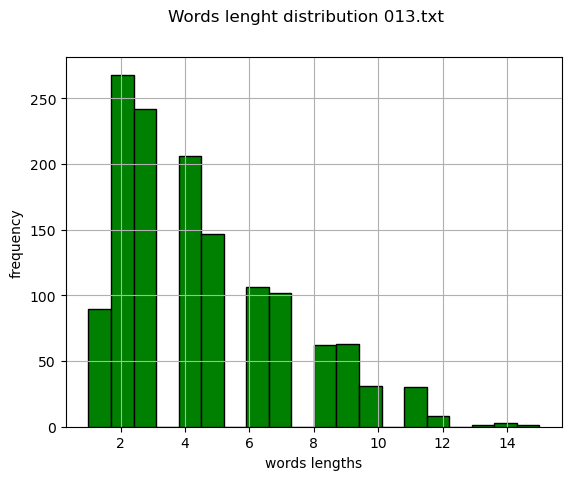

In [0]:
# 1 - output

words_length_plot(x_words, x_file)
words_length_plot(y_words, y_file)

print(f'mean {x_file} = {x_mean}')
print(f'variance {x_file} = {x_variance}')

print(f'mean {y_file} = {y_mean}')
print(f'variance {y_file} = {y_variance}')

## 2 - Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [0]:
# Returns dictionary of char: pst
def get_charpst(chars, char_len):
    charspst = {}
    for char in chars.keys():
        char_frequency = chars[char] / char_len
        charspst[char] = char_frequency
    return {k: charspst[k] for k in sorted(charspst.keys())}

# Draws a plot sorted by char and a plot sorted by frequency
def draw_double_plot(chars, char_len, caption):
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    fig.suptitle(caption)

    x_charfreq = get_charpst(chars, char_len)
    bar_x_locations = np.arange(len(x_charfreq))

    plt.sca(axs[0])
    plt.bar(bar_x_locations, x_charfreq.values(), align = 'center')
    plt.xticks(bar_x_locations, x_charfreq.keys())
    plt.grid()

    plt.sca(axs[1])
    x_charfreq = dict(sorted(x_charfreq.items(), key=lambda item: item[1], reverse=True))
    bar_x_locations = np.arange(len(x_charfreq))
    plt.bar(bar_x_locations, x_charfreq.values(), align = 'center')
    plt.xticks(bar_x_locations, x_charfreq.keys())
    plt.grid()
    plt.show()

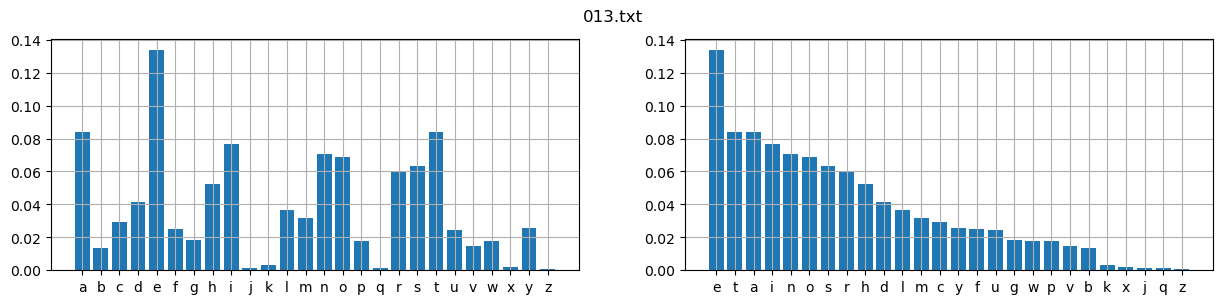

In [0]:
# 2 - output

draw_double_plot(x_chars, x_len, x_file)
draw_double_plot(y_chars, y_len, y_file)

## 3 - Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [0]:
# Contingential table - number of words of different lengths

x_words_count = Counter(x_words)
y_words_count = Counter(y_words)

number_of_different_sizes_words = max(max(x_words_count), max(y_words_count))

contingential_table_words = pd.DataFrame([x_words_count, y_words_count], index=[x_file, y_file], columns=range(1, number_of_different_sizes_words + 1)).fillna(0).astype(int)

# chi2 - test statistic
# p - the p-value of the test
# dof - degrees of freedom
# expected - the expected frequencies, based on the marginal sums of the table
test3_chi2, test3_p, test3_dof, test3_expected = stats.chi2_contingency(contingential_table_words)

contingential_table_words

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
017.txt,44,251,285,216,140,128,81,50,38,20,9,5,3,0,0
013.txt,90,268,242,206,147,106,102,62,63,31,30,8,1,3,1


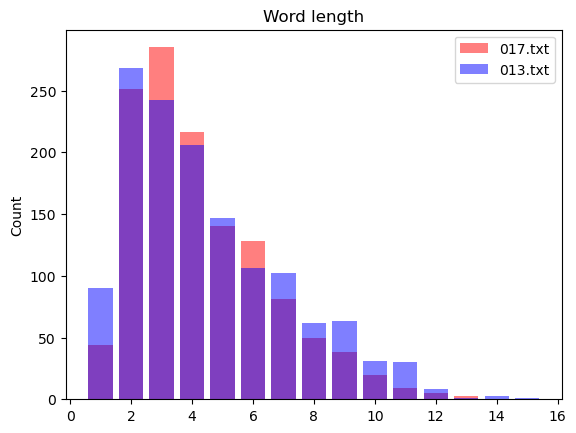

In [0]:
def plot_contingential_table(table, name1, name2, label_x = '', label_y = ''):
    fig, ax = plt.subplots()

    ax.bar(table.columns, table.loc[name1], label=name1, alpha=0.5, color='red')
    ax.bar(table.columns, table.loc[name2], label=name2, alpha=0.5, color='blue')

    ax.set_ylabel(label_y)
    ax.set_title(label_x)
    ax.legend()

    plt.show()

plot_contingential_table(contingential_table_words, x_file, y_file, 'Word length', 'Count')

$ \alpha = 0,05 $

$ H_0 $: Rozdělení délek slov **nezávisí** na tom, o který jde text.

$ H_A $: Rozdělení délek slov **závisí** na tom, o který jde text.

In [0]:
test3_alpha = 0.05

# percent point function
test3_ppf = stats.chi2.ppf(1 - test3_alpha, test3_dof)

print(f'test statistic χ² = {test3_chi2:.4g}')
print(f'p-value = {test3_p:.4g}')
print(f'percent point function = {test3_ppf:.4g}')

print()

if test3_chi2 < test3_ppf:
    print("We do not reject hypothesis H_0.")
else:
    print("We reject hypothesis H_0 in favor of the alternative hypothesis H_A.")

test statistic χ² = 48.57
p-value = 1.059e-05
percent point function = 23.68

We reject hypothesis H_0 in favor of the alternative hypothesis H_A.


Byla vytvořena kontingenční tabulka pro délku slov v daných textech.
Stanovila se nulová hypotéza $H_0$ `Rozdělení délek slov nezávisí na tom, o který jde text.` oproti alternativní hypotéze $H_A$ `Rozdělení délek slov závisí na tom, o který jde text.`.
Pro testování nulové hypotézy byla použita tato kontingenční tabulka.
Výsledky ukazují, že nulovou hypotézu $H_0$ zamítáme ve prospěch hypotézy $H_A$.
$p$-hodnota testu je `1.059e-05`.

## 4 - Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

Testujeme, zda jsou střední hodnoty délky slov shodné proti alternativě, že se nerovnají.
Použijeme dvouvýběrový t-test pro různé rozptyly.

$ H_0 $: Střední délky slov v obou textech se **rovnají**.

$ H_A $: Střední délky slov v obou textech se **nerovnají**.

$ \alpha = 0,05 $

In [0]:
# Levenuv test rovnosti rozptylu
test4roz_stat, test4roz_p = stats.levene(x_words, y_words)

# H0 = var1 = var2
# HA = var1 != var2
test4_equeal_variances = test4roz_p > 0.05

print(f'Levene test p value = {test4roz_p}')
print(f'Variance is equal = {test4_equeal_variances}')

Levene test p value = 4.480337293345598e-07
Variance is equal = False


In [0]:
import math

test4_alpha = 0.05

# statistic - the test statistic.
# pvalue - the p-value for the test.
test4_statistic, test4_p = stats.ttest_ind(x_words, y_words, equal_var = test4_equeal_variances)

x_variance_n = (x_variance/x_words_len)
y_variance_m = (y_variance/y_words_len)
sd = math.sqrt(x_variance_n + y_variance_m)
nd = (sd**4) / ( ((1/(x_words_len-1))*(x_variance_n**2)) + ((1/(y_words_len-1))*(y_variance_m**2)) )
q = 1-0.05/2
critical_val = stats.t.ppf(q, nd)

print(f'critical value = {critical_val}')
print(f'test statistic = {test4_statistic:.4g}')
print(f'p-value = {test4_p:.4g}')

if abs(test4_statistic) < critical_val:
    print('We do not reject hypothesis H_0.')
else:
    print('We reject hypothesis H_0 in favor of the alternative hypothesis H_A.')

critical value = 1.9608740124587043
test statistic = -2.347
p-value = 0.01898
We reject hypothesis H_0 in favor of the alternative hypothesis H_A.


Stanovila se nulová hypotéza $H_0$ `Střední délky slov v obou textech se rovnají.` oproti alternativní hypotéze $H_A$ `Střední délky slov v obou textech se nerovnají.`.
Pro testování nulové hypotézy byl použit dvouvýběrový ttest, přičemž nejdříve byl proveden Levenův test na shodnost rozptylů.
Rozptyly nejsou dle tohoto testu shodné.
Následně byl proveden dvouvýběrový ttest, kde výsledky ukazují, že nulovou hypotézu $H_0$ zamítáme ve prospěch hypotézy $H_A$.
$p$-hodnota testu je `0.01898`.

## 5 - Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [0]:
# Contingential table - letters usage

contingential_table_letters = pd.DataFrame([x_chars, y_chars], index=[x_file, y_file]).fillna(0).astype(int)

# chi2 - test statistic
# p - the p-value of the test
# dof - degrees of freedom
# expected - the expected frequencies, based on the marginal sums of the table
test5_chi2, test5_p, test5_dof, test5_expected = stats.chi2_contingency(contingential_table_letters)

contingential_table_letters

,t,h,e,a,r,i,s,c,o,f,b,u,l,n,g,v,d,m,w,p,y,k,j,x,q,z
017.txt,504,330,657,447,321,382,370,135,431,142,81,183,240,369,109,45,175,143,113,72,123,44,6,12,5,1
013.txt,516,323,819,513,371,471,387,180,420,154,83,150,225,433,113,92,256,195,110,108,157,20,10,11,9,4


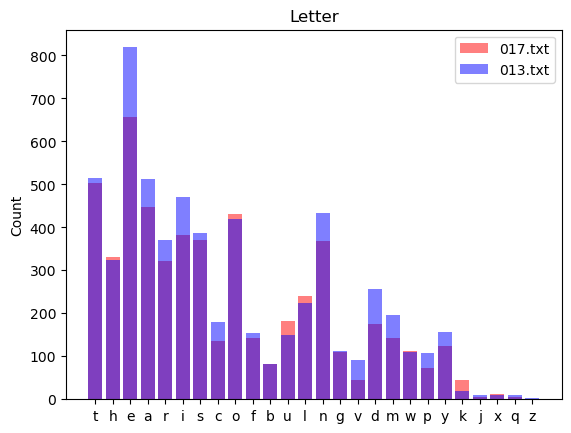

In [0]:
plot_contingential_table(contingential_table_letters, x_file, y_file, 'Letter', 'Count')

$ \alpha = 0,05 $

$ H_0 $: Rozdělení písmen **nezávisí** na tom, o který jde text.

$ H_A $: Rozdělení písmen **závisí** na tom, o který jde text.

In [0]:
test5_alpha = 0.05

# percent point function
test5_ppf = stats.chi2.ppf(1 - test5_alpha, test5_dof)

print(f'test statistic χ² = {test5_chi2:.4g}')
print(f'p-value = {test5_p:.4g}')
print(f'percent point function = {test5_ppf:.4g}')

print()

if test5_chi2 < test5_ppf:
    print("We do not reject hypothesis H_0.")
else:
    print("We reject hypothesis H_0 in favor of the alternative hypothesis H_A.")

test statistic χ² = 74.65
p-value = 7.679e-07
percent point function = 37.65

We reject hypothesis H_0 in favor of the alternative hypothesis H_A.


Byla vytvořena kontingenční tabulka pro rozdělení písmen v daných textech.
Stanovila se nulová hypotéza $H_0$ `Rozdělení délek slov nezávisí na tom, o který jde text.` oproti alternativní hypotéze $H_A$ `Rozdělení délek slov závisí na tom, o který jde text.`.
Pro testování nulové hypotézy byla použita tato kontingenční tabulka.
Výsledky ukazují, že nulovou hypotézu $H_0$ zamítáme ve prospěch hypotézy $H_A$.
$p$-hodnota testu je `7.679e-07`.